# 04: experiments

this notebook runs systematic experiments and compares results from the model registry.


Validation: 100%|██████████████████████████████| 79/79 [00:00<00:00, 152.27it/s]


Train Loss: 0.5052, Train Acc: 82.33%
Val Loss: 0.4746, Val Acc: 83.49%
New best validation accuracy: 83.49%

Training completed in 73.46s
Best validation accuracy: 83.49%
model registered with id: SimpleCNN_20251025_224445
✗ Error with simple_cnn: 'ModelRegistry' object has no attribute 'save_model'
  Training simple_cnn as fallback...
Training on cuda
Model parameters: 1,147,914

Epoch 1/30
--------------------------------------------------


Validation: 100%|██████████████████████████████| 79/79 [00:00<00:00, 158.31it/s]


Train Loss: 1.6174, Train Acc: 39.77%
Val Loss: 1.3150, Val Acc: 51.89%
New best validation accuracy: 51.89%

Epoch 2/30
--------------------------------------------------


Validation: 100%|██████████████████████████████| 79/79 [00:00<00:00, 160.54it/s]


Train Loss: 1.3120, Train Acc: 52.06%
Val Loss: 1.1217, Val Acc: 59.18%
New best validation accuracy: 59.18%

Epoch 3/30
--------------------------------------------------


Validation: 100%|██████████████████████████████| 79/79 [00:00<00:00, 153.38it/s]


Train Loss: 1.1738, Train Acc: 57.94%
Val Loss: 1.0276, Val Acc: 63.51%
New best validation accuracy: 63.51%

Epoch 4/30
--------------------------------------------------


Validation: 100%|██████████████████████████████| 79/79 [00:00<00:00, 157.26it/s]


Train Loss: 1.0715, Train Acc: 61.97%
Val Loss: 0.9446, Val Acc: 66.45%
New best validation accuracy: 66.45%

Epoch 5/30
--------------------------------------------------


Validation: 100%|██████████████████████████████| 79/79 [00:00<00:00, 157.95it/s]


Train Loss: 0.9996, Train Acc: 64.43%
Val Loss: 0.8736, Val Acc: 68.60%
New best validation accuracy: 68.60%

Epoch 6/30
--------------------------------------------------


Validation: 100%|██████████████████████████████| 79/79 [00:00<00:00, 144.89it/s]


Train Loss: 0.9455, Train Acc: 66.69%
Val Loss: 0.8399, Val Acc: 70.22%
New best validation accuracy: 70.22%

Epoch 7/30
--------------------------------------------------


Validation: 100%|██████████████████████████████| 79/79 [00:00<00:00, 146.00it/s]


Train Loss: 0.9080, Train Acc: 68.05%
Val Loss: 0.7688, Val Acc: 72.42%
New best validation accuracy: 72.42%

Epoch 8/30
--------------------------------------------------


Training:  46%|██▎  | 144/313 [00:01<00:01, 127.57it/s, Loss=1.0084, Acc=69.61%]


KeyboardInterrupt: 

## Hyperparameter optimization

In [12]:
def hyperparameter_optimization():
    learning_rates = [0.001, 0.01]
    batch_sizes = [32, 64, 128]
    results = []
    for lr, bs in product(learning_rates, batch_sizes):
        print(f"Testing: lr={lr}, batch_size={bs}")
        temp_config = Config()
        temp_config.learning_rate = lr
        temp_config.batch_size = bs
        temp_config.epochs = 5
        
        temp_train_loader, temp_val_loader, _ = get_cifar10_loaders(temp_config)
        
        model = create_model('simple_cnn', temp_config).to(temp_config.device)
        trainer = Trainer(model, temp_config)
        
        start_time = time.time()
        history = trainer.fit(temp_train_loader, temp_val_loader)
        training_time = time.time() - start_time
        
        best_val_acc = max(history['val_acc'])
        results.append({
            'learning_rate': lr,
            'batch_size': bs,
            'best_val_acc': best_val_acc,
            'training_time': training_time
        })
        print(f"Best val acc: {best_val_acc:.4f}, Time: {training_time:.2f}s") 
    return results
hyperparameter_results = hyperparameter_optimization()
print(f"Hyperparameter optimization completed: {len(hyperparameter_results)} configurations tested")

Testing: lr=0.001, batch_size=32
Training on cuda
Model parameters: 1,147,914

Epoch 1/5
--------------------------------------------------


Validation: 100%|████████████████████████████| 313/313 [00:00<00:00, 522.68it/s]


Train Loss: 1.8519, Train Acc: 31.11%
Val Loss: 1.5148, Val Acc: 42.01%
New best validation accuracy: 42.01%

Epoch 2/5
--------------------------------------------------


Validation: 100%|████████████████████████████| 313/313 [00:00<00:00, 534.85it/s]


Train Loss: 1.5597, Train Acc: 42.98%
Val Loss: 1.2311, Val Acc: 56.14%
New best validation accuracy: 56.14%

Epoch 3/5
--------------------------------------------------


Validation: 100%|████████████████████████████| 313/313 [00:00<00:00, 531.92it/s]


Train Loss: 1.2996, Train Acc: 53.49%
Val Loss: 1.0955, Val Acc: 59.91%
New best validation accuracy: 59.91%

Epoch 4/5
--------------------------------------------------


Validation: 100%|████████████████████████████| 313/313 [00:00<00:00, 514.00it/s]


Train Loss: 1.1241, Train Acc: 60.39%
Val Loss: 0.8607, Val Acc: 69.55%
New best validation accuracy: 69.55%

Epoch 5/5
--------------------------------------------------


Validation: 100%|████████████████████████████| 313/313 [00:00<00:00, 509.42it/s]


Train Loss: 1.0220, Train Acc: 64.21%
Val Loss: 0.7908, Val Acc: 72.45%
New best validation accuracy: 72.45%

Training completed in 20.34s
Best validation accuracy: 72.45%
model registered with id: SimpleCNN_20251025_221724
Best val acc: 72.4500, Time: 20.35s
Testing: lr=0.001, batch_size=64
Training on cuda
Model parameters: 1,147,914

Epoch 1/5
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 234.81it/s]


Train Loss: 1.6666, Train Acc: 38.37%
Val Loss: 1.3514, Val Acc: 50.81%
New best validation accuracy: 50.81%

Epoch 2/5
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 279.99it/s]


Train Loss: 1.3869, Train Acc: 49.75%
Val Loss: 1.1636, Val Acc: 58.71%
New best validation accuracy: 58.71%

Epoch 3/5
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 268.73it/s]


Train Loss: 1.2231, Train Acc: 56.51%
Val Loss: 1.0144, Val Acc: 63.91%
New best validation accuracy: 63.91%

Epoch 4/5
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 296.20it/s]


Train Loss: 1.0986, Train Acc: 60.96%
Val Loss: 0.9163, Val Acc: 67.43%
New best validation accuracy: 67.43%

Epoch 5/5
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 308.03it/s]


Train Loss: 1.0103, Train Acc: 64.49%
Val Loss: 0.8504, Val Acc: 69.48%
New best validation accuracy: 69.48%

Training completed in 15.40s
Best validation accuracy: 69.48%
model registered with id: SimpleCNN_20251025_221741
Best val acc: 69.4800, Time: 15.41s
Testing: lr=0.001, batch_size=128
Training on cuda
Model parameters: 1,147,914

Epoch 1/5
--------------------------------------------------


Validation: 100%|██████████████████████████████| 79/79 [00:00<00:00, 159.60it/s]


Train Loss: 1.6455, Train Acc: 38.94%
Val Loss: 1.3262, Val Acc: 51.60%
New best validation accuracy: 51.60%

Epoch 2/5
--------------------------------------------------


Validation: 100%|██████████████████████████████| 79/79 [00:00<00:00, 166.26it/s]


Train Loss: 1.3367, Train Acc: 51.26%
Val Loss: 1.1063, Val Acc: 60.16%
New best validation accuracy: 60.16%

Epoch 3/5
--------------------------------------------------


Validation: 100%|██████████████████████████████| 79/79 [00:00<00:00, 151.18it/s]


Train Loss: 1.1908, Train Acc: 57.21%
Val Loss: 0.9977, Val Acc: 64.58%
New best validation accuracy: 64.58%

Epoch 4/5
--------------------------------------------------


Validation: 100%|██████████████████████████████| 79/79 [00:00<00:00, 143.64it/s]


Train Loss: 1.0800, Train Acc: 61.58%
Val Loss: 0.9167, Val Acc: 66.41%
New best validation accuracy: 66.41%

Epoch 5/5
--------------------------------------------------


Validation: 100%|██████████████████████████████| 79/79 [00:00<00:00, 172.65it/s]


Train Loss: 1.0038, Train Acc: 64.32%
Val Loss: 0.9238, Val Acc: 67.64%
New best validation accuracy: 67.64%

Training completed in 12.30s
Best validation accuracy: 67.64%
model registered with id: SimpleCNN_20251025_221755
Best val acc: 67.6400, Time: 12.31s
Testing: lr=0.01, batch_size=32
Training on cuda
Model parameters: 1,147,914

Epoch 1/5
--------------------------------------------------


Validation: 100%|████████████████████████████| 313/313 [00:00<00:00, 459.90it/s]


Train Loss: 1.8336, Train Acc: 31.96%
Val Loss: 1.5164, Val Acc: 43.66%
New best validation accuracy: 43.66%

Epoch 2/5
--------------------------------------------------


Validation: 100%|████████████████████████████| 313/313 [00:00<00:00, 434.37it/s]


Train Loss: 1.5416, Train Acc: 43.72%
Val Loss: 1.2361, Val Acc: 54.04%
New best validation accuracy: 54.04%

Epoch 3/5
--------------------------------------------------


Validation: 100%|████████████████████████████| 313/313 [00:00<00:00, 421.73it/s]


Train Loss: 1.2855, Train Acc: 54.20%
Val Loss: 1.0369, Val Acc: 62.36%
New best validation accuracy: 62.36%

Epoch 4/5
--------------------------------------------------


Validation: 100%|████████████████████████████| 313/313 [00:00<00:00, 427.69it/s]


Train Loss: 1.1149, Train Acc: 60.46%
Val Loss: 0.8956, Val Acc: 68.99%
New best validation accuracy: 68.99%

Epoch 5/5
--------------------------------------------------


Validation: 100%|████████████████████████████| 313/313 [00:00<00:00, 362.40it/s]


Train Loss: 1.0157, Train Acc: 64.58%
Val Loss: 0.8452, Val Acc: 70.74%
New best validation accuracy: 70.74%

Training completed in 26.22s
Best validation accuracy: 70.74%
model registered with id: SimpleCNN_20251025_221823
Best val acc: 70.7400, Time: 26.24s
Testing: lr=0.01, batch_size=64
Training on cuda
Model parameters: 1,147,914

Epoch 1/5
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 225.01it/s]


Train Loss: 1.6767, Train Acc: 37.97%
Val Loss: 1.3548, Val Acc: 50.03%
New best validation accuracy: 50.03%

Epoch 2/5
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 185.20it/s]


Train Loss: 1.3934, Train Acc: 49.33%
Val Loss: 1.2473, Val Acc: 56.22%
New best validation accuracy: 56.22%

Epoch 3/5
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 264.83it/s]


Train Loss: 1.2221, Train Acc: 56.11%
Val Loss: 0.9963, Val Acc: 64.07%
New best validation accuracy: 64.07%

Epoch 4/5
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 259.16it/s]


Train Loss: 1.1139, Train Acc: 60.51%
Val Loss: 0.8799, Val Acc: 68.68%
New best validation accuracy: 68.68%

Epoch 5/5
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 244.66it/s]


Train Loss: 1.0196, Train Acc: 63.89%
Val Loss: 0.8492, Val Acc: 70.12%
New best validation accuracy: 70.12%

Training completed in 18.99s
Best validation accuracy: 70.12%
model registered with id: SimpleCNN_20251025_221844
Best val acc: 70.1200, Time: 19.00s
Testing: lr=0.01, batch_size=128
Training on cuda
Model parameters: 1,147,914

Epoch 1/5
--------------------------------------------------


Validation: 100%|██████████████████████████████| 79/79 [00:00<00:00, 146.92it/s]


Train Loss: 1.6196, Train Acc: 39.81%
Val Loss: 1.3986, Val Acc: 47.35%
New best validation accuracy: 47.35%

Epoch 2/5
--------------------------------------------------


Validation: 100%|██████████████████████████████| 79/79 [00:00<00:00, 149.90it/s]


Train Loss: 1.3101, Train Acc: 52.26%
Val Loss: 1.1926, Val Acc: 58.52%
New best validation accuracy: 58.52%

Epoch 3/5
--------------------------------------------------


Validation: 100%|██████████████████████████████| 79/79 [00:00<00:00, 152.97it/s]


Train Loss: 1.1558, Train Acc: 58.62%
Val Loss: 1.0773, Val Acc: 62.15%
New best validation accuracy: 62.15%

Epoch 4/5
--------------------------------------------------


Validation: 100%|██████████████████████████████| 79/79 [00:00<00:00, 130.34it/s]


Train Loss: 1.0584, Train Acc: 62.34%
Val Loss: 0.9858, Val Acc: 65.54%
New best validation accuracy: 65.54%

Epoch 5/5
--------------------------------------------------


Validation: 100%|██████████████████████████████| 79/79 [00:00<00:00, 146.54it/s]


Train Loss: 0.9898, Train Acc: 65.10%
Val Loss: 0.8676, Val Acc: 69.16%
New best validation accuracy: 69.16%

Training completed in 14.77s
Best validation accuracy: 69.16%
model registered with id: SimpleCNN_20251025_221901
Best val acc: 69.1600, Time: 14.78s
Hyperparameter optimization completed: 6 configurations tested


## Visualization

Best hyperparameters: LR=0.001, BS=32.0
Best validation accuracy: 72.4500%


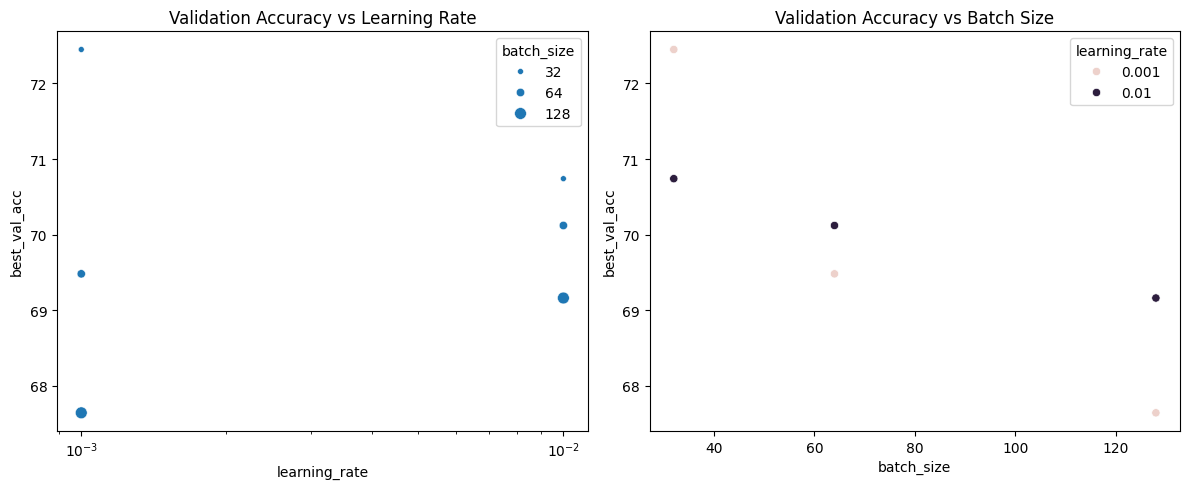

In [13]:
import pandas as pd
df_hp = pd.DataFrame(hyperparameter_results)
best_hp = df_hp.loc[df_hp['best_val_acc'].idxmax()]
print(f"Best hyperparameters: LR={best_hp['learning_rate']}, BS={best_hp['batch_size']}")
print(f"Best validation accuracy: {best_hp['best_val_acc']:.4f}%")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(data=df_hp, x='learning_rate', y='best_val_acc', size='batch_size', ax=axes[0])
axes[0].set_title('Validation Accuracy vs Learning Rate')
axes[0].set_xscale('log')
sns.scatterplot(data=df_hp, x='batch_size', y='best_val_acc', hue='learning_rate', ax=axes[1])
axes[1].set_title('Validation Accuracy vs Batch Size')
plt.tight_layout()
plt.show()

## Ensemble Learning 

In [14]:
class OptimizedEnsemble(nn.Module):
    def __init__(self, models, weights=None):
        super(OptimizedEnsemble, self).__init__()
        self.models = nn.ModuleList(models)
        if weights is None:
            weights = [1.0] * len(models)
        self.weights = torch.tensor(weights, dtype=torch.float32)
        self.weights = self.weights / self.weights.sum()
    def forward(self, x):
        outputs = []
        for model in self.models:
            outputs.append(model(x))
        weighted_outputs = []
        for i, output in enumerate(outputs):
            weighted_outputs.append(output * self.weights[i])
        return torch.stack(weighted_outputs, dim=0).sum(dim=0)
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(config.device), labels.to(config.device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

## Create different ensemble combinations

In [17]:
class OptimizedEnsemble(nn.Module):
    def __init__(self, models, weights=None):
        super(OptimizedEnsemble, self).__init__()
        self.models = nn.ModuleList(models)
        if weights is None:
            weights = [1.0] * len(models)
        self.weights = torch.tensor(weights, dtype=torch.float32, device=next(iter(models)).device)
        self.weights = self.weights / self.weights.sum() 
    def forward(self, x):
        if len(self.models) == 0:
            raise ValueError("No models in ensemble")
        
        outputs = []
        for model in self.models:
            model.eval()
            with torch.no_grad():
                output = model(x)
                outputs.append(output)
        
        if len(outputs) == 0:
            raise ValueError("No outputs from models")
        stacked_outputs = torch.stack(outputs, dim=0)
        weighted_outputs = stacked_outputs * self.weights.view(-1, 1, 1)
        return weighted_outputs.sum(dim=0)

def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(config.device), labels.to(config.device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    return accuracy
print("Checking loaded models...")
for name, model in existing_models.items():
    print(f"{name}: {type(model).__name__}")
    print(f"  Device: {next(model.parameters()).device}")
    print(f"  Parameters: {sum(p.numel() for p in model.parameters()):,}")
print("Creating ensemble combinations...")
individual_accuracies = {}
for name, model in existing_models.items():
    try:
        acc = evaluate_model(model, test_loader)
        individual_accuracies[name] = acc
        print(f"{name} individual accuracy: {acc:.4f}%")
    except Exception as e:
        print(f"Error evaluating {name}: {e}")
if len(existing_models) < 2:
    print("Not enough models for ensemble. Need at least 2 models.")
    print("Available models:", list(existing_models.keys()))
else:
    ensemble_models = [existing_models[name] for name in model_names if name in existing_models]
    print(f"Creating ensemble with {len(ensemble_models)} models")
    
    try:
        equal_ensemble = OptimizedEnsemble(ensemble_models)
        equal_acc = evaluate_model(equal_ensemble, test_loader)
        print(f"Equal weight ensemble accuracy: {equal_acc:.4f}%")
    except Exception as e:
        print(f"Error creating equal ensemble: {e}")
        equal_acc = 0
    try:
        weights = [individual_accuracies[name] for name in model_names if name in existing_models]
        weighted_ensemble = OptimizedEnsemble(ensemble_models, weights)
        weighted_acc = evaluate_model(weighted_ensemble, test_loader)
        print(f"Weighted ensemble accuracy: {weighted_acc:.4f}%")
    except Exception as e:
        print(f"Error creating weighted ensemble: {e}")
        weighted_acc = 0
    try:
        best_models = sorted(individual_accuracies.items(), key=lambda x: x[1], reverse=True)[:2]
        best_ensemble_models = [existing_models[name] for name, _ in best_models]
        best_ensemble = OptimizedEnsemble(best_ensemble_models)
        best_acc = evaluate_model(best_ensemble, test_loader)
        print(f"Best 2 models ensemble accuracy: {best_acc:.4f}%")
    except Exception as e:
        print(f"Error creating best ensemble: {e}")
        best_acc = 0

    print(f"\nEnsemble Analysis:")
    if individual_accuracies:
        print(f"Best individual accuracy: {max(individual_accuracies.values()):.4f}%")
        print(f"Equal ensemble improvement: {equal_acc - max(individual_accuracies.values()):.4f}%")
        print(f"Weighted ensemble improvement: {weighted_acc - max(individual_accuracies.values()):.4f}%")
        print(f"Best 2 ensemble improvement: {best_acc - max(individual_accuracies.values()):.4f}%")
    else:
        print("No individual accuracies available for comparison")

Checking loaded models...
Creating ensemble combinations...
Not enough models for ensemble. Need at least 2 models.
Available models: []
